In [1]:
%matplotlib inline
import matplotlib.pylab as pylab

import pymc as mc

import pandas as pd
import numpy as np
import datetime

In [2]:
import vpfits

# VPfits

The VPfits module contains a class, `VPfit`, that carries out most of the heavy lifting. First we create an instance of this class.

In [3]:
vpfit = vpfits.VPfit()

`VPfit` also contains a function for creating mock absoprtion profiles, `mock_absorption`. Just tell it how many features you wish to include. It returns a dataframe, `clouds`, containing each feature, and an array of wavelength values. It can also plot the profile.

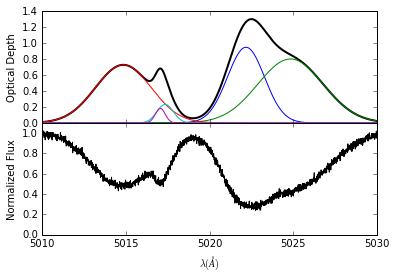

In [12]:
n = 5

clouds, wavelength_array = vpfits.mock_absorption(n=n, plot=True)

The plot shows the profile with added noise, but right now doesn't return this noisy profile, so we recreate it here.

In [13]:
onesigmaerror = 0.02
noise = np.random.normal(0.0, onesigmaerror, len(wavelength_array))
flux_array = vpfit.Absorption(sum(clouds['tau'])) + noise

To fit, call the `fit` method of `VPfit`, providing the wavelength and flux profiles we wish to fit to, as well as `n`, the number of features to fit.

In [14]:
vpfit.fit(wavelength_array, flux_array, n)

 [-----------------100%-----------------] 10000 of 10000 complete in 27.9 sec
Took: 0:00:27.887096  to finish.


Our `VPfit` instance, `vpfit`, now contains the fitted profile components.

We can also query some features of the fit, such as the Maximum A Posteriori (MAP) Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC).

In [15]:
print vpfit.MAP.BIC
print vpfit.MAP.AIC

-9833.10982262
-9922.72426197


We also have model selection metrics from the MCMC

In [16]:
print vpfit.mcmc.BPIC
print vpfit.mcmc.DIC

-9932.34904688
-9944.12210642


Finally, we can also plot the fit, with residuals. The fitted components and actual components can be directly compared.

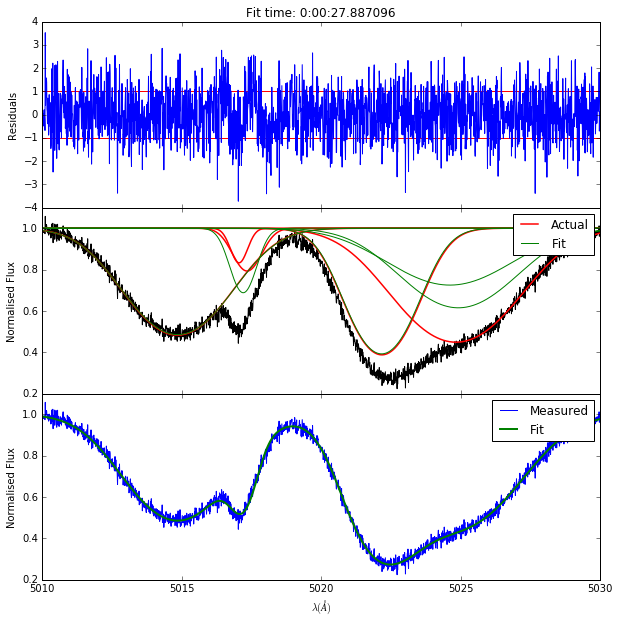

In [17]:
vpfit.plot(wavelength_array, flux_array, clouds, n=n)

## Finding the right number of profiles

In a complicated spectrum, knowing how many components there are can be difficult. `VPfits` can perform model selection on two fits with different numbers of profiles to determine which is the best.

Below is an early implementation using the Bayesian Predictive Information Criterion (BPIC) as a threshold. It finds that 4 profiles fit the data within the given threshold, close enough to the actual 5.

In [18]:
r = 0
n = 1
vpfit_2 = vpfits.VPfit()
vpfit_2.fit(wavelength_array, flux_array, n)

while r < 0.95:
    
    print "n: ", n
    
    vpfit_1 = vpfit_2
    
    vpfit_2 = vpfits.VPfit()
    vpfit_2.fit(wavelength_array, flux_array, n+1)
    
    print vpfit_1.mcmc.BPIC
    print vpfit_2.mcmc.BPIC
    
    print vpfit_1.mcmc.BPIC / vpfit_2.mcmc.BPIC
    
    r = vpfit_1.mcmc.BPIC / vpfit_2.mcmc.BPIC
    
    n += 1
    

 [-----------------100%-----------------] 10000 of 10000 complete in 5.8 sec
Took: 0:00:05.786322  to finish.
n:  1
 [-----------------100%-----------------] 10000 of 10000 complete in 11.3 sec
Took: 0:00:11.310630  to finish.
-1057.1121232
-4963.79858931
0.212964346594
n:  2
 [-----------------100%-----------------] 10000 of 10000 complete in 17.5 sec
Took: 0:00:17.543600  to finish.
-4963.79858931
-7585.89094369
0.65434615738
n:  3
 [-----------------100%-----------------] 10000 of 10000 complete in 23.5 sec
Took: 0:00:23.454696  to finish.
-7585.89094369
-9931.8517811
0.763794215912
n:  4
 [-----------------100%-----------------] 10000 of 10000 complete in 29.4 sec
Took: 0:00:29.423441  to finish.
-9931.8517811
-9919.88241189
1.00120660394


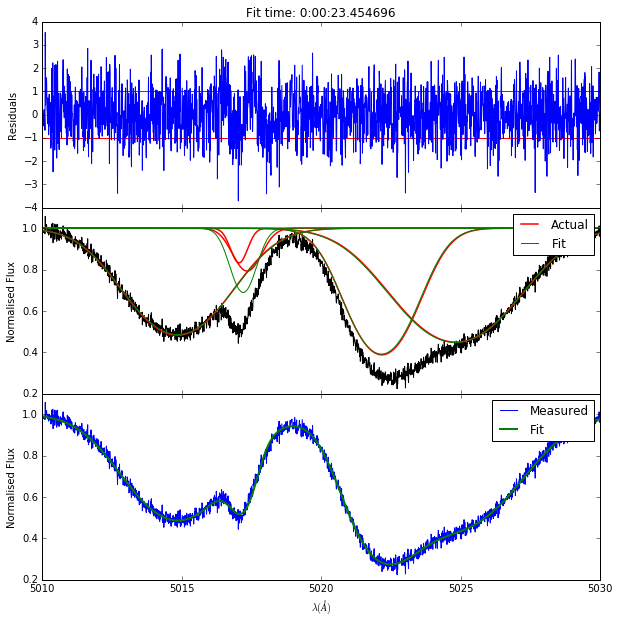

In [19]:
vpfit_1.plot(wavelength_array, flux_array, clouds, n-1)